In [1]:
# importing os module
import os
import numpy as np
from PIL import Image
from numpy import asarray

In [2]:
#Function to convert images to array
def img_to_array(emotion):
    #first_two = emotion[0:2]
    x = []
    y = []
    #x.append([])
    #x[0].append([])
    folder = "C:/Users/User/Project 4 local/archive/"+emotion
    for count, filename in enumerate(os.listdir(folder)):
        # load the image
        img = Image.open(f"{folder}/{filename}")
        # asarray() class is used to convert
        # PIL images into NumPy arrays
        img_data = asarray(img)
        #img_data = img_data.reshape(-1,1)
        #np.append(X, img_data,axis=0)
        x.append(img_data)
        y.append(filename[0:2])
    return x,y

In [3]:
# Call image to array function to convert all images to array
feature1,target1 = img_to_array("anger")
feature2,target2 = img_to_array("contempt")
feature3,target3 = img_to_array("disgust")
feature4,target4 = img_to_array("fear")
feature5,target5 = img_to_array("happiness")
feature6,target6 = img_to_array("neutrality")
feature7,target7 = img_to_array("sadness")
feature8,target8 = img_to_array("surprise")


In [4]:
# Combine all features into one list
feature = feature1 + feature2 + feature3 + feature4 + feature5 + feature6 + feature7 + feature8
len(feature)

5558

In [5]:
# Transforms the list into a numpy array
feature_arr = np.array(feature)

In [6]:
# Check the shape of the array
feature_arr.shape

(5558, 224, 224)

In [7]:
# Combine all targets into one list
target = target1 + target2 + target3 + target4 + target5 + target6 + target7 + target8
# Transforms the list into a numpy array
target_arr = np.array(target)
# Check the shape of the array
target_arr.shape

(5558,)

In [8]:
# Tranfer the arrays to coresponding variables
X = feature_arr
y= target_arr

In [9]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
# Check the shape of traing data
X_train.shape

(4168, 224, 224)

In [11]:
# Check the shape of testing data
y_train.shape

(4168,)

In [12]:
#Check the grayscale values of the first image
X_train[0, :, :]

array([[185, 185, 185, ..., 181, 181, 181],
       [185, 185, 185, ..., 181, 181, 181],
       [185, 185, 185, ..., 181, 181, 181],
       ...,
       [ 89,  89,  89, ...,  39,  39,  39],
       [ 89,  89,  89, ...,  39,  39,  39],
       [ 89,  89,  89, ...,  39,  39,  39]], dtype=uint8)

In [13]:
# We want to flatten our image of 224x224 pixels to a 1D array of 50176 pixels
ndims = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], ndims)
X_test = X_test.reshape(X_test.shape[0], ndims)
print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (4168, 50176)
Testing Shape: (1390, 50176)


In [14]:
# Dependencies to Visualise the model
%matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
import tensorflow as tf
# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler
# Keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()

In [15]:
# Next, we normalise our training data to be between 0 and 1
scaler = MinMaxScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Check the traing data
y_train[:200]

array(['an', 'ne', 'fe', 'ne', 'an', 'ne', 'su', 'su', 'ha', 'ha', 'co',
       'su', 'an', 'ha', 'fe', 'an', 'fe', 'ha', 'ha', 'ha', 'ha', 'ne',
       'an', 'sa', 'ha', 'ha', 'ne', 'co', 'fe', 'an', 'fe', 'sa', 'ha',
       'an', 'ne', 'su', 'ha', 'ha', 'an', 'sa', 'fe', 'di', 'ha', 'ha',
       'ne', 'an', 'sa', 'ha', 'sa', 'an', 'su', 'an', 'ha', 'su', 'sa',
       'ha', 'ha', 'fe', 'fe', 'su', 'di', 'ha', 'an', 'sa', 'ne', 'ne',
       'su', 'ne', 'di', 'su', 'co', 'ha', 'ne', 'ha', 'an', 'sa', 'su',
       'su', 'fe', 'sa', 'su', 'di', 'ha', 'sa', 'su', 'su', 'di', 'sa',
       'sa', 'ha', 'sa', 'ha', 'ne', 'an', 'fe', 'di', 'ha', 'sa', 'ne',
       'su', 'an', 'ha', 'an', 'sa', 'ha', 'su', 'di', 'ha', 'su', 'su',
       'ha', 'su', 'ne', 'ha', 'an', 'ne', 'sa', 'ne', 'an', 'an', 'an',
       'sa', 'ne', 'fe', 'co', 'di', 'ha', 'di', 'ha', 'su', 'fe', 'sa',
       'fe', 'ne', 'sa', 'su', 'ha', 'fe', 'fe', 'su', 'an', 'ha', 'su',
       'su', 'ha', 'an', 'fe', 'di', 'ne', 'ne', 'h

In [17]:
# y_train_reshaped = y_train.reshape(-1, 1) 
# y_test_reshaped = y_test.reshape(-1, 1)

In [18]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [19]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.fit_transform(y_test)

In [20]:
classes = le.classes_
classes

array(['an', 'co', 'di', 'fe', 'ha', 'ne', 'sa', 'su'], dtype='<U2')

In [21]:
# We need to convert our target labels (expected values) to categorical data
num_classes = len(classes)
y_train_cat = to_categorical(y_train_encoded, num_classes)
y_test_cat = to_categorical(y_test_encoded, num_classes)
# Original label of `Surprise` is one-hot encoded as `00000001`
y_train_cat[0]

array([1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [22]:
X_train_scaled.shape

(4168, 50176)

In [23]:
y_train

array(['an', 'ne', 'fe', ..., 'su', 'su', 'an'], dtype='<U2')

In [24]:
# Create an empty sequential model
model = Sequential()

In [25]:
# Add the first layer where the input dimensions are the 784 pixel values
# We can also choose our activation function. `relu` is a common
model.add(Dense(170, activation='relu', input_dim=X_train_scaled.shape[1]))

In [26]:
# Add a second hidden layer
model.add(Dense(60, activation='relu'))

In [27]:
# Add a second hidden layer
model.add(Dense(50, activation='relu'))

In [28]:
# Add a second hidden layer
model.add(Dense(90, activation='relu'))

In [29]:
# Add a second hidden layer
model.add(Dense(50, activation='relu'))

In [30]:
# Add our final output layer where the number of nodes 
# corresponds to the number of y labels
model.add(Dense(num_classes, activation='softmax'))

In [31]:
# We can summarise our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 170)               8530090   
                                                                 
 dense_1 (Dense)             (None, 60)                10260     
                                                                 
 dense_2 (Dense)             (None, 50)                3050      
                                                                 
 dense_3 (Dense)             (None, 90)                4590      
                                                                 
 dense_4 (Dense)             (None, 50)                4550      
                                                                 
 dense_5 (Dense)             (None, 8)                 408       
                                                                 
Total params: 8,552,948
Trainable params: 8,552,948
Non-

In [32]:
# Use categorical crossentropy for categorical data and mean squared error for regression
# Hint: your output layer in this example is using software for logistic regression (categorical)
# If your output layer activation was `linear` then you may want to use `mse` for loss
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [34]:
# Fit (train) the model
model.fit(
    X_train_scaled,
    y_train_cat,
    epochs=200,
    shuffle=True,
    verbose=2
)

Epoch 1/200
131/131 - 27s - loss: 1.4144 - accuracy: 0.4866 - 27s/epoch - 209ms/step
Epoch 2/200
131/131 - 27s - loss: 1.4154 - accuracy: 0.4779 - 27s/epoch - 208ms/step
Epoch 3/200
131/131 - 29s - loss: 1.4083 - accuracy: 0.4894 - 29s/epoch - 220ms/step
Epoch 4/200
131/131 - 27s - loss: 1.4017 - accuracy: 0.4868 - 27s/epoch - 208ms/step
Epoch 5/200
131/131 - 29s - loss: 1.3930 - accuracy: 0.4945 - 29s/epoch - 222ms/step
Epoch 6/200
131/131 - 33s - loss: 1.3671 - accuracy: 0.5060 - 33s/epoch - 249ms/step
Epoch 7/200
131/131 - 32s - loss: 1.3401 - accuracy: 0.5079 - 32s/epoch - 241ms/step
Epoch 8/200
131/131 - 27s - loss: 1.4261 - accuracy: 0.4858 - 27s/epoch - 208ms/step
Epoch 9/200
131/131 - 28s - loss: 1.3567 - accuracy: 0.4954 - 28s/epoch - 214ms/step
Epoch 10/200
131/131 - 29s - loss: 1.3340 - accuracy: 0.5156 - 29s/epoch - 220ms/step
Epoch 11/200
131/131 - 32s - loss: 1.3543 - accuracy: 0.5072 - 32s/epoch - 242ms/step
Epoch 12/200
131/131 - 27s - loss: 1.3212 - accuracy: 0.5173 - 

## Saving and Loading models

We can save our trained models using the HDF5 binary format with the extension `.h5`

In [35]:
# Save the model
model.save("emotion_trained.h5")

In [36]:
# Load the model
from tensorflow.keras.models import load_model
model = load_model("emotion_trained.h5")

## Evaluating the Model

We use our testing data to validate our model. This is how we determine the validity of our model (i.e. the ability to predict new and previously unseen data points)

In [38]:
# Evaluate the model using the training data 
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_cat, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

44/44 - 1s - loss: 5.0263 - accuracy: 0.3237 - 1s/epoch - 25ms/step
Loss: 5.02626371383667, Accuracy: 0.32374101877212524


## Making Predictions

We can use our trained model to make predictions using `model.predict`

In [41]:
# Define default image size for our model
image_path = os.path.join("Images", "happy.jpeg")
image_size = (224, 224)

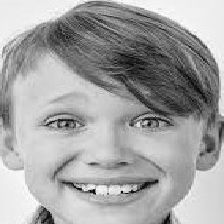

In [42]:
from tensorflow.keras.preprocessing import image
im = image.load_img(image_path, target_size=image_size, color_mode="grayscale")
im

In [43]:
# Convert the image to a numpy array 
from tensorflow.keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape

(224, 224, 1)

In [44]:
# Scale the image pixels by 255 (or use a scaler from sklearn here)
image /= 255

# Flatten into a 1x28*28 array 
img = image.flatten().reshape(-1, 224*224)
img.shape

(1, 50176)

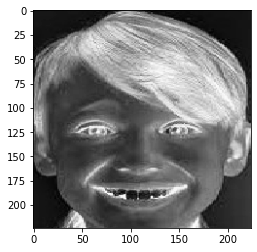

In [46]:
plt.imshow(img.reshape(224, 224), cmap=plt.cm.Greys)

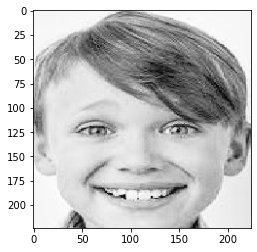

In [49]:
# Invert the pixel values to match the original data
img = 1 - img
plt.imshow(img.reshape(224, 224), cmap=plt.cm.Greys)

In [53]:
# Make a prediction. The result should be 0000010000000 for a 5
model.predict(img).round()

1/1 [==============================] - 0s 45ms/step


array([[0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [36]:
# A better convolutional neural network
 
# Model defining
model = keras.Sequential([
    keras.layers.AveragePooling2D(6, 3,
                                  input_shape=(32, 50176)),
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])


ValueError: Input 0 of layer "conv2d_4" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 9, 50176)

In [33]:
 
# Compiling a model
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [34]:
 
# Fitting the model
model.fit(X_train_scaled, y_train_cat, epochs=5,
          batch_size=32)

Epoch 1/5


ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 300, 300, 1), found shape=(32, 50176)